# SC1015 Project - Premier League Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split

In [2]:
resultsData = pd.read_csv('results.csv')
statsData = pd.read_csv('stats.csv')
statsData.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


## Total of 240 Rows and 42 Columns in stats.CSV file

### 2 Categorical Variables, 40 Numeric Variables

In [3]:
statsData.info()
statsData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

(240, 42)

# Data Cleaning

## Check for any missing values in the stats Dataframe

In [4]:
statsDataFrame = pd.DataFrame(statsData)

# Check for missing values in each column
missing_values = statsDataFrame.isnull().sum()

# Print the number of missing values for each column
print(missing_values)
print()

# Filter out columns that have missing values and print them
missing_values_filtered = missing_values[missing_values > 0]
if len(missing_values_filtered) > 0:
    print("Columns with missing values and their count:")
    print(missing_values_filtered)
else:
    print("There are no missing values in any column.")

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

## Check the skewness for each of the columns with missing values

### Total of 6 columns with missing values will be placed in a pd DataFrame

In [5]:
missingValueColumns = pd.DataFrame(statsDataFrame[['saves', 'head_clearance', 'total_through_ball', 'backward_pass', 'big_chance_missed', 'dispossessed']])
missingValueColumns.skew()

saves                 0.392526
head_clearance        0.519139
total_through_ball    1.725295
backward_pass         0.713525
big_chance_missed     1.065818
dispossessed          0.639976
dtype: float64

### Analysis:

saves (0.392526): This shows a moderate positive skew, suggesting that most of the data are concentrated on the lower end, with fewer high values extending the tail to the right.

head_clearance (0.519139): Also indicates a moderate positive skew. Similar to "saves", most data points are lower, with some high values stretching the distribution to the right.

total_through_ball (1.725295): This has a high positive skewness, indicating a significant number of lower values and a long tail towards the higher values. This suggests that very high values are relatively rare but significantly impact the distribution's shape.

backward_pass (0.713525): Shows a positive skew but less extreme than total_through_ball. It indicates a concentration of data towards lower values with a tail of higher values.

big_chance_missed (1.065818): With a positive skewness greater than 1, this distribution has a long right tail. There are significantly more lower values, with the higher values stretching the distribution.

dispossessed (0.639976): Exhibits a moderate positive skew, indicating a concentration of lower values with a tail of higher values, but not as pronounced as total_through_ball or big_chance_missed.

Due to the existence of missing values, we decided to exclude the columns for head_clearance, total_through_ball, backward_pass, dispossessed, and saves. These columns pertain to actions such as clearing the ball using the head, executing passes in dynamic situations, making passes back towards one's own side, losing possession to an opponent, and preventing shots from scoring.

As a result, we are now concentrating on the 'big_chance_missed' columns, which we consider to be a strong predictor of a team's goals scored and its standing. The 'big_chance_missed' metric records significant scoring opportunities that were not capitalized on, potentially altering the outcome of a game.

Based on the positive skewness of the data, median imputation is generally more robust than mean imputation. The median is less affected by outliers and skewed data, making it a more representative measure of central tendency for skewed distributions. Therefore based on this, we decided to fill in the missing values for the saves and big_chance_missed, based on the median value for each club (20 Clubs total)

## Dropping of columns: head_clearance, total_through_ball, backward_pass, dispossessed

In [6]:
statsDataFrame.drop(columns=['head_clearance', 'total_through_ball', 'backward_pass', 'dispossessed', 'saves'], inplace=True)
statsDataFrame.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,2397.0,918.0,258.0,25686.0,NaN,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,2270.0,897.0,231.0,24010.0,NaN,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,2800.0,1107.0,282.0,24150.0,NaN,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,2045.0,873.0,278.0,25592.0,NaN,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,2408.0,796.0,181.0,22200.0,NaN,2.0,0.0,51.0,24.0,2006-2007


### statsDataFrame now has 37 columns

## Fill in missing values for big_chance_missed using Median

In [7]:
# Derby County/Charlton Athletic/Sheffield United/Portsmouth
filtered_indices = statsDataFrame['team'] == 'AFC Bournemouth'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("AFC Bournemouth, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Arsenal'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Arsenal, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Aston Villa'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Aston Villa, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Birmingham City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Birmingham City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Blackburn Rovers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Blackburn Rovers, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Blackpool'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Blackpool, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Bolton Wanderers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Bolton Wanderers, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Burnley'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Burnley, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Brighton and Hove Albion'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Brighton and Hove Albion, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Cardiff City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Cardiff City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Charlton Athletic'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Charlton Athletic, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Chelsea'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Chelsea, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Crystal Palace'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Crystal Palace, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)


filtered_indices = statsDataFrame['team'] == 'Derby County'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Derby County, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Everton'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Everton, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Fulham'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Fulham, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Huddersfield Town'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Huddersfield Town, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Hull City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Hull City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Leicester City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Leicester City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Liverpool'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Liverpool, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Manchester City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Manchester City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Manchester United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Manchester United, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Middlesbrough'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Middlesbrough, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Newcastle United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Newcastle United, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Norwich City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Norwich City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Queens Park Rangers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Queens Park Rangers, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Reading'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Reading, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Portsmouth'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Portsmouth, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Sheffield United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Sheffield United, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Southampton'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Southampton, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Swansea City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Swansea City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Sunderland'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Sunderland, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Stoke City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Stoke City, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Tottenham Hotspur'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Tottenham Hotspur, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Watford'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Watford, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'West Ham United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("West Ham United, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'West Bromwich Albion'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("West Bromwich Albion, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Wigan Athletic'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Wigan Athletic, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)


filtered_indices = statsDataFrame['team'] == 'Wolverhampton Wanderers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Wolverhampton Wanderers, Median of big_chance_missed column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

AFC Bournemouth, Median of big_chance_missed column: 25.0
Arsenal, Median of big_chance_missed column: 54.0
Aston Villa, Median of big_chance_missed column: 30.0
Birmingham City, Median of big_chance_missed column: 30.0
Blackburn Rovers, Median of big_chance_missed column: 40.5
Blackpool, Median of big_chance_missed column: 46.0
Bolton Wanderers, Median of big_chance_missed column: 33.5
Burnley, Median of big_chance_missed column: 22.0
Brighton and Hove Albion, Median of big_chance_missed column: 30.0
Cardiff City, Median of big_chance_missed column: 30.0
Charlton Athletic, Median of big_chance_missed column: nan
Chelsea, Median of big_chance_missed column: 42.0
Crystal Palace, Median of big_chance_missed column: 31.0
Derby County, Median of big_chance_missed column: nan
Everton, Median of big_chance_missed column: 39.5
Fulham, Median of big_chance_missed column: 38.0
Huddersfield Town, Median of big_chance_missed column: 21.0
Hull City, Median of big_chance_missed column: 22.0
Leicest

/opt/anaconda3/envs/notebook-7.0.8/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/notebook-7.0.8/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/notebook-7.0.8/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/notebook-7.0.8/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Adding of new column "Draw" to the statsDataFrame

Upon reviewing the statsDataFrame, we noticed the absence of a "draw" column that would reflect the number of draws a football team had during the season. Considering each team plays 38 matches annually, we computed the "draw" figures by deducting the sum of wins and losses from 38. After calculating this data, we would integrate this new "draw" column into the existing dataFrame.

In [8]:
# Calculate the "draw" column first
statsDataFrame['draw'] = 38 - statsDataFrame['wins'] - statsDataFrame['losses']

# Get the position of the 'losses' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('losses') + 1

# Insert the 'draw' column next to 'losses'
statsDataFrame.insert(position, 'draw_temp', statsDataFrame['draw'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('draw', axis=1, inplace=True)
statsDataFrame.rename(columns={'draw_temp': 'draw'}, inplace=True)

statsDataFrame.shape

(240, 38)

## Adding of new column "total_points" to the statsDataFrame

Using wins and draw to tally the total points; 1 win = 3 points, 1 draw = 1 point. 
At the end of each season, team with most points would win.

In [9]:
# Calculate the "total_points" column first
statsDataFrame['total_points'] = statsDataFrame['wins'] * 3 + statsDataFrame['draw'] 

# Get the position of the 'draw' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('draw') + 1

# Insert the 'total_points' column next to 'draw'
statsDataFrame.insert(position, 'total_points_temp', statsDataFrame['total_points'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('total_points', axis=1, inplace=True)
statsDataFrame.rename(columns={'total_points_temp': 'total_points'}, inplace=True)

statsDataFrame.shape

(240, 39)

## Adding of new column "goal_difference" to the statsDataFrame

In [10]:
# Assuming statsDataFrame is your existing DataFrame

# Calculate the goal difference for each club for each season
statsDataFrame['goal_difference'] = statsDataFrame['goals'] - statsDataFrame['goals_conceded']

total_points_index = statsDataFrame.columns.get_loc('total_points') + 1

# Reorder columns to place 'goal_difference' next to 'total_points'
statsDataFrame = statsDataFrame.reindex(columns= [*statsDataFrame.columns[:total_points_index],
                                                  'goal_difference',
                                                  *statsDataFrame.columns[total_points_index:-1]])

statsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   draw                  240 non-null    float64
 4   total_points          240 non-null    float64
 5   goal_difference       240 non-null    float64
 6   goals                 240 non-null    float64
 7   total_yel_card        240 non-null    float64
 8   total_red_card        240 non-null    float64
 9   total_scoring_att     240 non-null    float64
 10  ontarget_scoring_att  240 non-null    float64
 11  hit_woodwork          240 non-null    float64
 12  att_hd_goal           240 non-null    float64
 13  att_pen_goal          240 non-null    float64
 14  att_freekick_goal     240 non-null    float64
 15  att_ibox_goal         2

## Adding of new column "placing" to the statsDataFrame
"Placing" will mean the position the team finished in for the season.

In [11]:
# Define the column variable to sort by
column_to_sort = 'total_points'
secondary_sort_column = 'goal_difference'
# Function to sort every 20 rows based on a column and modify the main DataFrame
def sort_every_20(df, column, secondary_column):
    for i in range(0, len(df), 20):
        subset = df.iloc[i:i+20]
        sorted_subset = subset.sort_values(by=[column, secondary_column], ascending=[False, False])
        df.iloc[i:i+20] = sorted_subset.values
    return df

# Call the function with your DataFrame
sorted_statsDataFrame = sort_every_20(statsDataFrame, column_to_sort,secondary_sort_column)

print(sorted_statsDataFrame)
statsDataFrame['placing'] = np.tile(range(1, 21), 12)[:len(statsDataFrame)]


# Get the position of the 'total_points' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('total_points') + 1

# Insert the 'placing' column next to 'draw'
statsDataFrame.insert(position, 'placing_temp', statsDataFrame['placing'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('placing', axis=1, inplace=True)
statsDataFrame.rename(columns={'placing_temp': 'placing'}, inplace=True)

                     team  wins  losses  draw  total_points  goal_difference  \
0       Manchester United  28.0     5.0   5.0          89.0             56.0   
1                 Chelsea  24.0     3.0  11.0          83.0             40.0   
2               Liverpool  20.0    10.0   8.0          68.0             30.0   
3                 Arsenal  19.0     8.0  11.0          68.0             28.0   
4       Tottenham Hotspur  17.0    12.0   9.0          60.0              3.0   
..                    ...   ...     ...   ...           ...              ...   
235     Huddersfield Town   9.0    19.0  10.0          37.0            -30.0   
236           Southampton   7.0    16.0  15.0          36.0            -19.0   
237          Swansea City   8.0    21.0   9.0          33.0            -28.0   
238            Stoke City   7.0    19.0  12.0          33.0            -33.0   
239  West Bromwich Albion   6.0    19.0  13.0          31.0            -25.0   

     goals  total_yel_card  total_red_c

# Exploratory Data Analysis

In [12]:
points = pd.DataFrame(statsDataFrame['total_points']) # Response
goals = pd.DataFrame(statsDataFrame['goals'])
goals_conceded = pd.DataFrame(statsDataFrame['goals_conceded'])
touches = pd.DataFrame(statsDataFrame['touches'])
clean_sheet = pd.DataFrame(statsDataFrame['clean_sheet'])
total_scoring_att = pd.DataFrame(statsDataFrame['total_scoring_att'])
att_ibox_goal = pd.DataFrame(statsDataFrame['att_ibox_goal'])
total_clearance = pd.DataFrame(statsDataFrame['total_clearance'])
corner_taken = pd.DataFrame(statsDataFrame['corner_taken'])
goal_fastbreak = pd.DataFrame(statsDataFrame['goal_fastbreak'])

<Axes: >

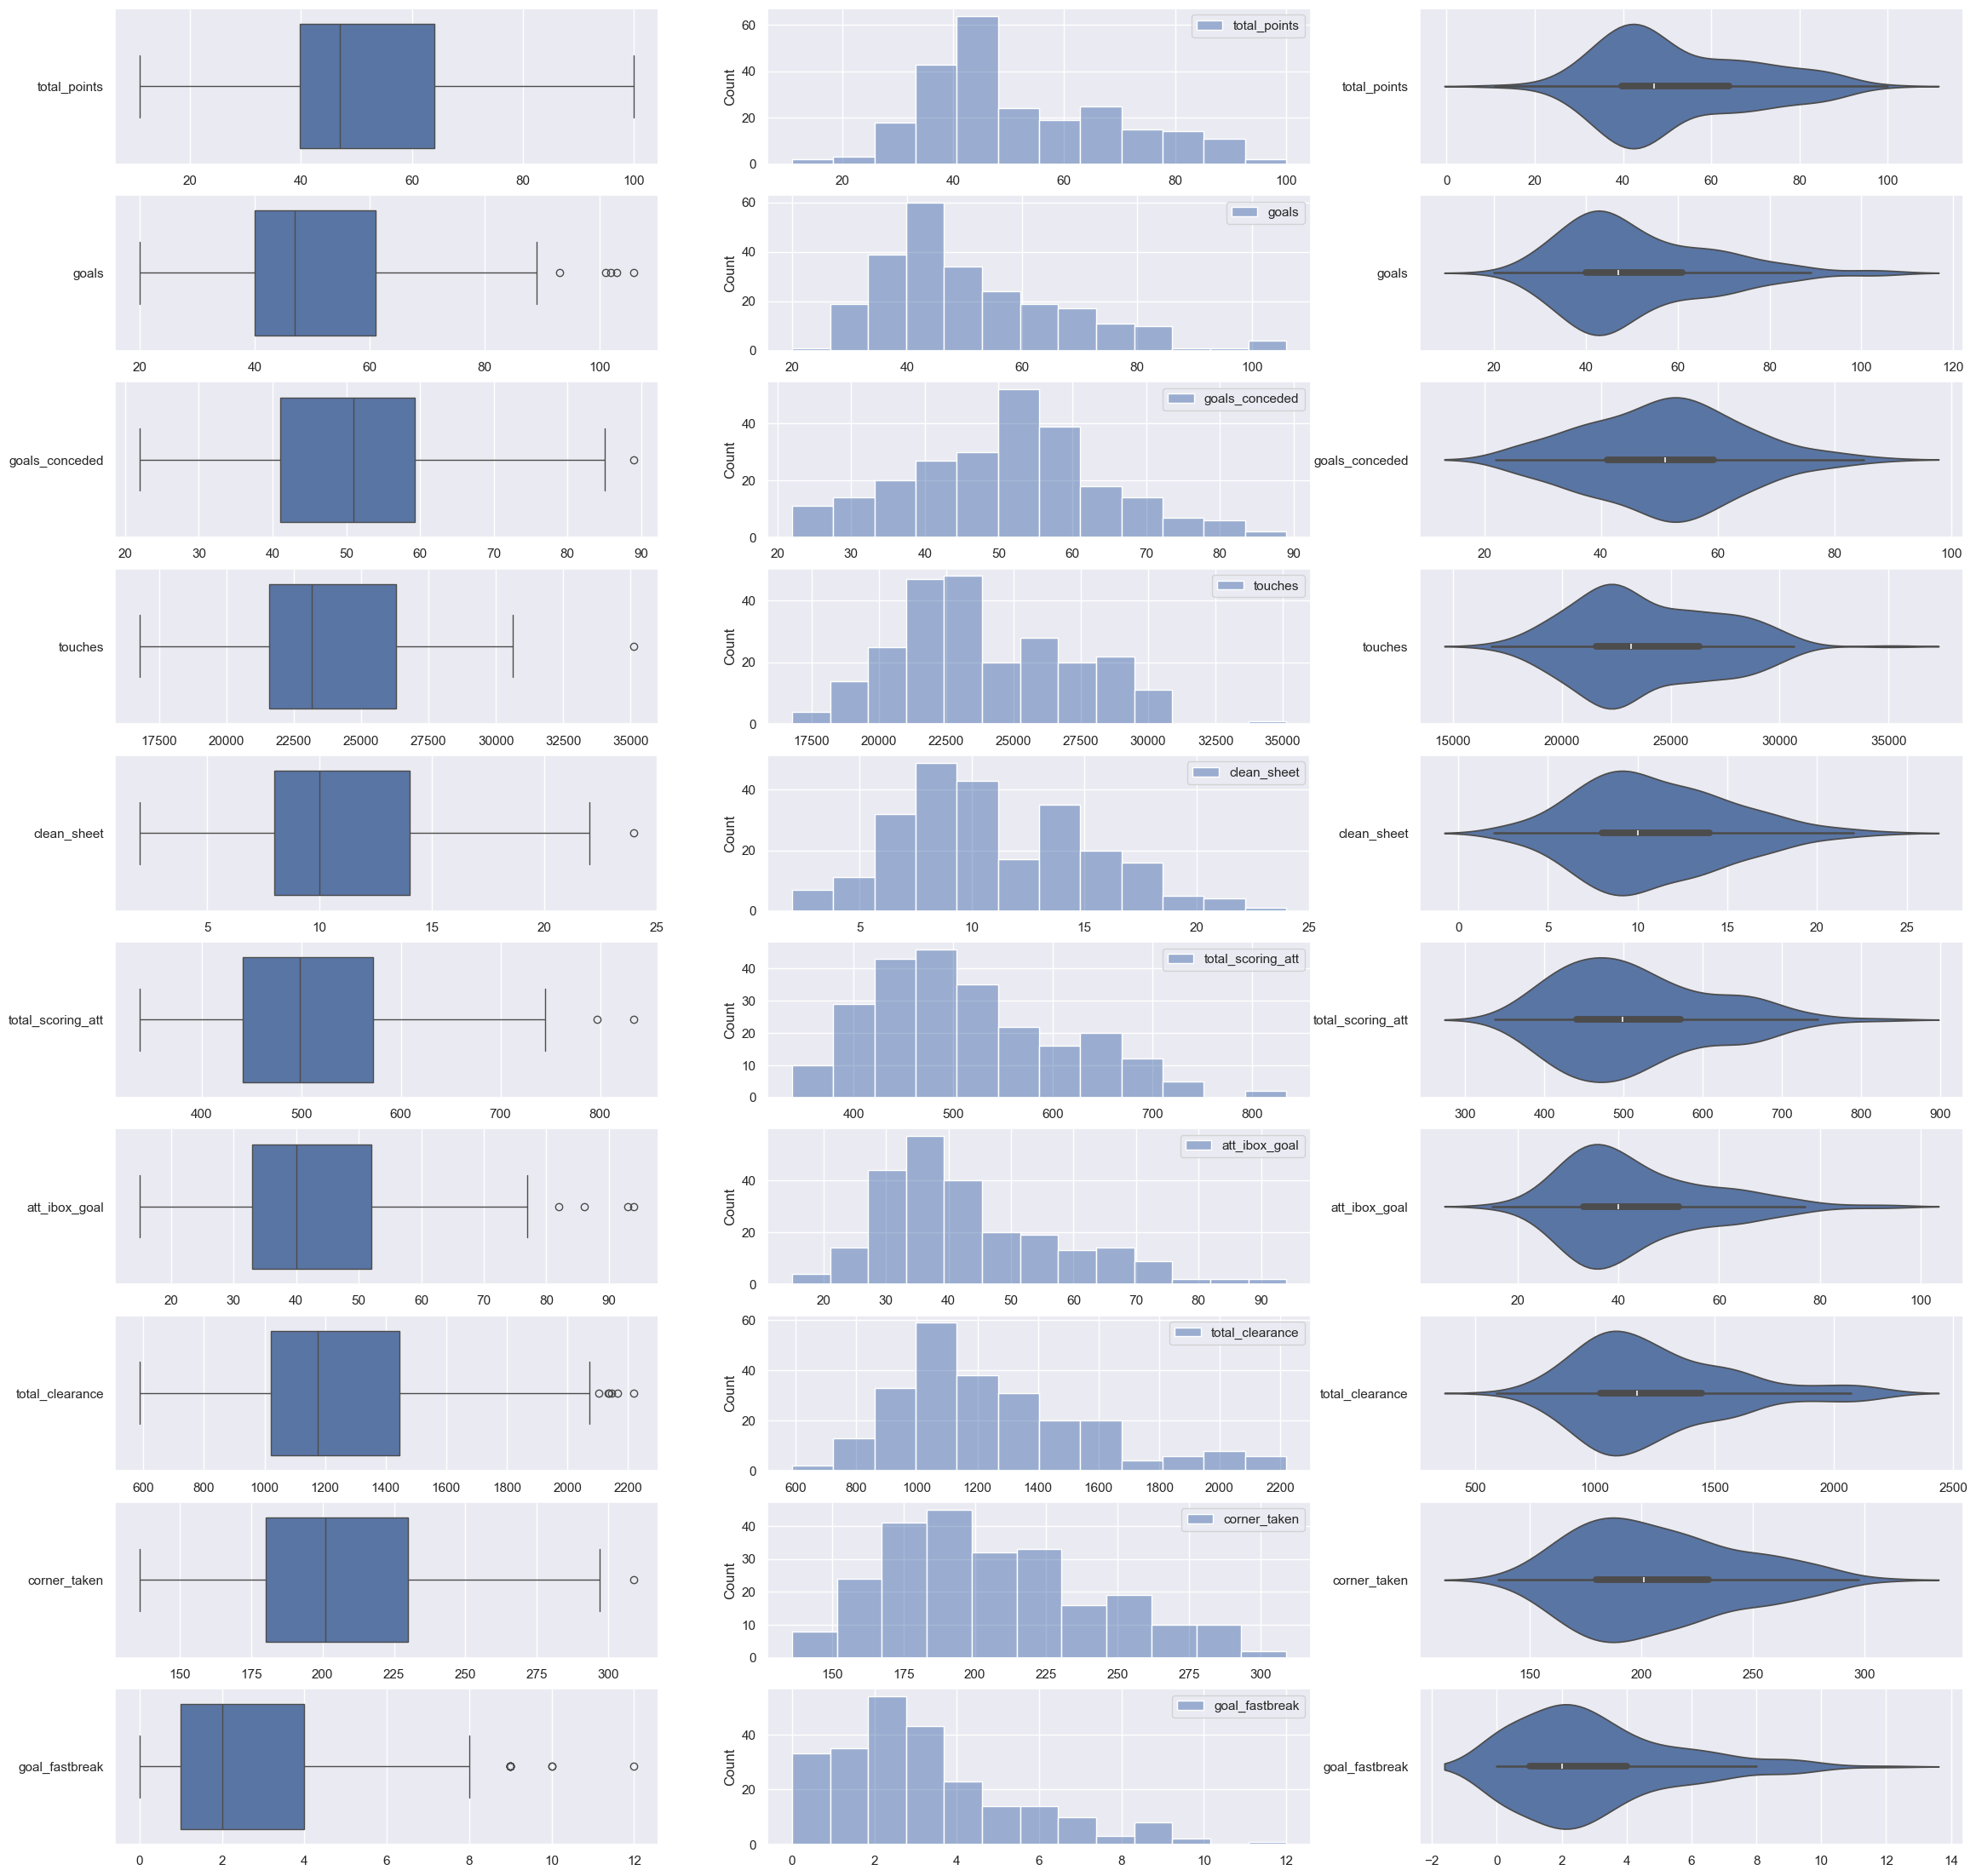

In [13]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(10, 3, figsize=(28, 28))

# Plot the basic uni-variate figures for total points
sb.boxplot(data = points, orient = "h", ax = axes[0,0])
sb.histplot(data = points, ax = axes[0,1])
sb.violinplot(data = points, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for goals
sb.boxplot(data = goals, orient = "h", ax = axes[1,0])
sb.histplot(data = goals, ax = axes[1,1])
sb.violinplot(data = goals, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for goal_conceded
sb.boxplot(data = goals_conceded, orient = "h", ax = axes[2,0])
sb.histplot(data = goals_conceded, ax = axes[2,1])
sb.violinplot(data = goals_conceded, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for touches
sb.boxplot(data = touches, orient = "h", ax = axes[3,0])
sb.histplot(data = touches, ax = axes[3,1])
sb.violinplot(data = touches, orient = "h", ax = axes[3,2])

# Plot the basic uni-variate figures for clean_sheet
sb.boxplot(data = clean_sheet, orient = "h", ax = axes[4,0])
sb.histplot(data = clean_sheet, ax = axes[4,1])
sb.violinplot(data = clean_sheet, orient = "h", ax = axes[4,2])

# Plot the basic uni-variate figures for total_scoring_att
sb.boxplot(data = total_scoring_att, orient = "h", ax = axes[5,0])
sb.histplot(data = total_scoring_att, ax = axes[5,1])
sb.violinplot(data = total_scoring_att, orient = "h", ax = axes[5,2])

# Plot the basic uni-variate figures for att_ibox_goal
sb.boxplot(data = att_ibox_goal, orient = "h", ax = axes[6,0])
sb.histplot(data = att_ibox_goal, ax = axes[6,1])
sb.violinplot(data = att_ibox_goal, orient = "h", ax = axes[6,2])

# Plot the basic uni-variate figures for total_clearance
sb.boxplot(data = total_clearance, orient = "h", ax = axes[7,0])
sb.histplot(data = total_clearance, ax = axes[7,1])
sb.violinplot(data = total_clearance, orient = "h", ax = axes[7,2])

# Plot the basic uni-variate figures for corner_taken
sb.boxplot(data = corner_taken, orient = "h", ax = axes[8,0])
sb.histplot(data = corner_taken, ax = axes[8,1])
sb.violinplot(data = corner_taken, orient = "h", ax = axes[8,2])

# Plot the basic uni-variate figures for goal_fastbreak
sb.boxplot(data = goal_fastbreak, orient = "h", ax = axes[9,0])
sb.histplot(data = goal_fastbreak, ax = axes[9,1])
sb.violinplot(data = goal_fastbreak, orient = "h", ax = axes[9,2])

## Correlation Matrix between variables

,total_points,goals,goals_conceded,touches,clean_sheet,total_scoring_att,att_ibox_goal,total_clearance,corner_taken,goal_fastbreak
total_points,1.000000,0.897552,-0.844932,0.706400,0.786316,0.758362,0.866657,-0.232686,0.710133,0.524788
goals,0.897552,1.000000,-0.624305,0.733838,0.573981,0.788062,0.978795,-0.260985,0.737691,0.529927
goals_conceded,-0.844932,-0.624305,1.000000,-0.533557,-0.871475,-0.610340,-0.598241,0.161763,-0.598309,-0.427056
touches,0.706400,0.733838,-0.533557,1.000000,0.556637,0.711154,0.736474,-0.352259,0.609470,0.354302
clean_sheet,0.786316,0.573981,-0.871475,0.556637,1.000000,0.558961,0.552602,-0.211607,0.535355,0.370926
total_scoring_att,0.758362,0.788062,-0.610340,0.711154,0.558961,1.000000,0.748991,-0.144269,0.794554,0.490123
att_ibox_goal,0.866657,0.978795,-0.598241,0.736474,0.552602,0.748991,1.000000,-0.296321,0.703582,0.488333
total_clearance,-0.232686,-0.260985,0.161763,-0.352259,-0.211607,-0.144269,-0.296321,1.000000,-0.213919,0.056526
corner_taken,0.710133,0.737691,-0.598309,0.609470,0.535355,0.794554,0.703582,-0.213919,1.000000,0.428009
goal_fastbreak,0.524788,0.529927,-0.427056,0.354302,0.370926,0.490123,0.488333,0.056526,0.428009,1.000000


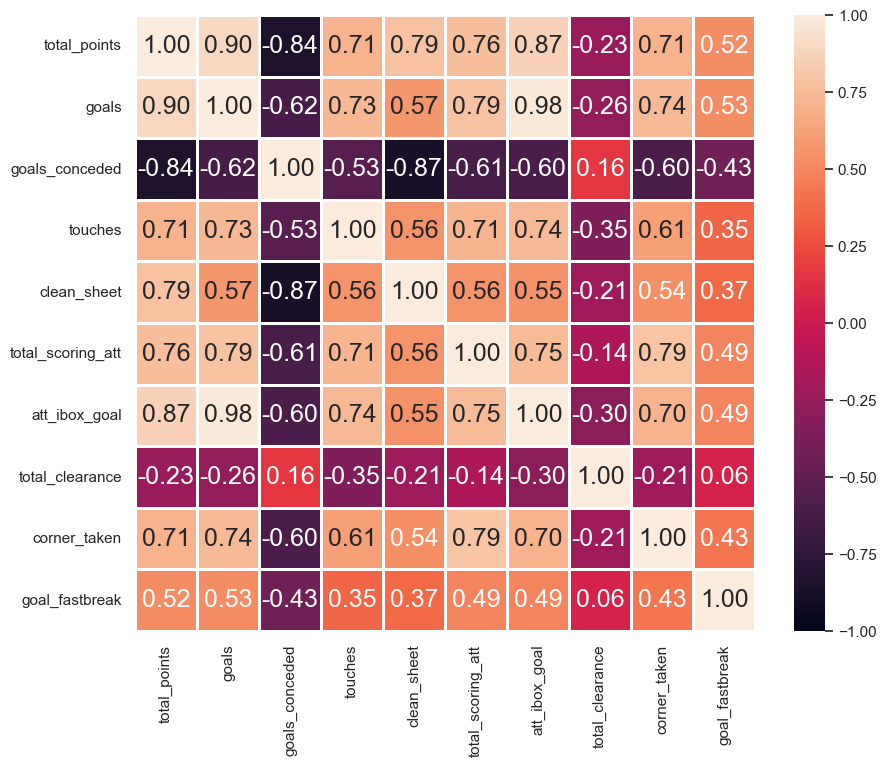

In [14]:
jointDF = pd.concat([points, goals, goals_conceded, touches, clean_sheet, total_scoring_att,att_ibox_goal,total_clearance,corner_taken,goal_fastbreak], axis = 1).reindex(points.index)
f = plt.figure(figsize = (10,8))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size" : 18})
jointDF.corr()
#hi

### Analysis:

Goals: Highly positively correlated with total points (0.90), it gets in line for considering to be added to the model.

Goals Conceded: The defender of a team is another prospect with a strong negative correlation with total points (-0.84) and hence might be included in the list as indicator of the defensive strength.

Touches, Clean Sheet & Corner Taken: Sufficiently related with total points (0.71, 0.79 and 0.71 respectively), indicating they are very important and remember that this strongly correlated with each other (that is the coefficient is 0.56), suggesting multicollinearity if both are included.

Total Scoring Att: In high degree positive correlation with total points (0.76) this factor shows great individual impact upon the overall team result.

Attack in box goals:Although it has a high positive correlation with total points (0.87) and could be a useful factor, it is a subset of the Goals variable and thus should be ommited to avoid biasness.

Total Clearance: Variable should not be used as it has a low negative correlation with Total Points and thus would not be a strong viarable to predict Total Points.

Goal Fastbreak: This varuable is a subset of Goals and thus can be ommited.

In [15]:
statsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   draw                  240 non-null    float64
 4   total_points          240 non-null    float64
 5   placing               240 non-null    int64  
 6   goal_difference       240 non-null    float64
 7   goals                 240 non-null    float64
 8   total_yel_card        240 non-null    float64
 9   total_red_card        240 non-null    float64
 10  total_scoring_att     240 non-null    float64
 11  ontarget_scoring_att  240 non-null    float64
 12  hit_woodwork          240 non-null    float64
 13  att_hd_goal           240 non-null    float64
 14  att_pen_goal          240 non-null    float64
 15  att_freekick_goal     2

# Linear Regression

As we aim to derive valuable insights that contribute to football betting, we plan to explore the relationship between total points and the variables 'goals', 'goals_conceded', 'clean_sheet', 'total_scoring_att', and 'corner_taken' using multivariate linear regression. We intend to structure our data to model it as a time series. For instance, we'll use data from 2006-2015 as training data to test against the 2016 season, and data from 2006-2016 as training data to test against the 2017 season, and so on. The model will predict the total points based on the predictors mentioned above. By testing the model against the data from 2016, 2017, and 2018, we will evaluate whether the model’s prediction accuracy is sufficiently reliable to forecast subsequent season winners.

## Bivariate Linear Regression

Model results for training on 9_seasons and testing on the next season:
Model details for predictor: goals
 Intercept of Regression: 3.3445692406715963
 Coefficient of Regression for goals: 0.9603124015173404
 Goodness of Fit - Train Dataset:
  R^2 = 0.7913
  MSE = 60.0978
 Goodness of Fit - Test Dataset:
  R^2 = 0.7739
  MSE = 60.7098

Model details for predictor: goals_conceded
 Intercept of Regression: 106.75885301565651
 Coefficient of Regression for goals_conceded: -1.0747341798205063
 Goodness of Fit - Train Dataset:
  R^2 = 0.7073
  MSE = 84.2747
 Goodness of Fit - Test Dataset:
  R^2 = 0.7935
  MSE = 55.4489

Model details for predictor: clean_sheet
 Intercept of Regression: 18.599273039419515
 Coefficient of Regression for clean_sheet: 3.0619324811888884
 Goodness of Fit - Train Dataset:
  R^2 = 0.5993
  MSE = 115.3745
 Goodness of Fit - Test Dataset:
  R^2 = 0.6895
  MSE = 83.3526

Model details for predictor: total_scoring_att
 Intercept of Regression: -19.647305901460157
 C

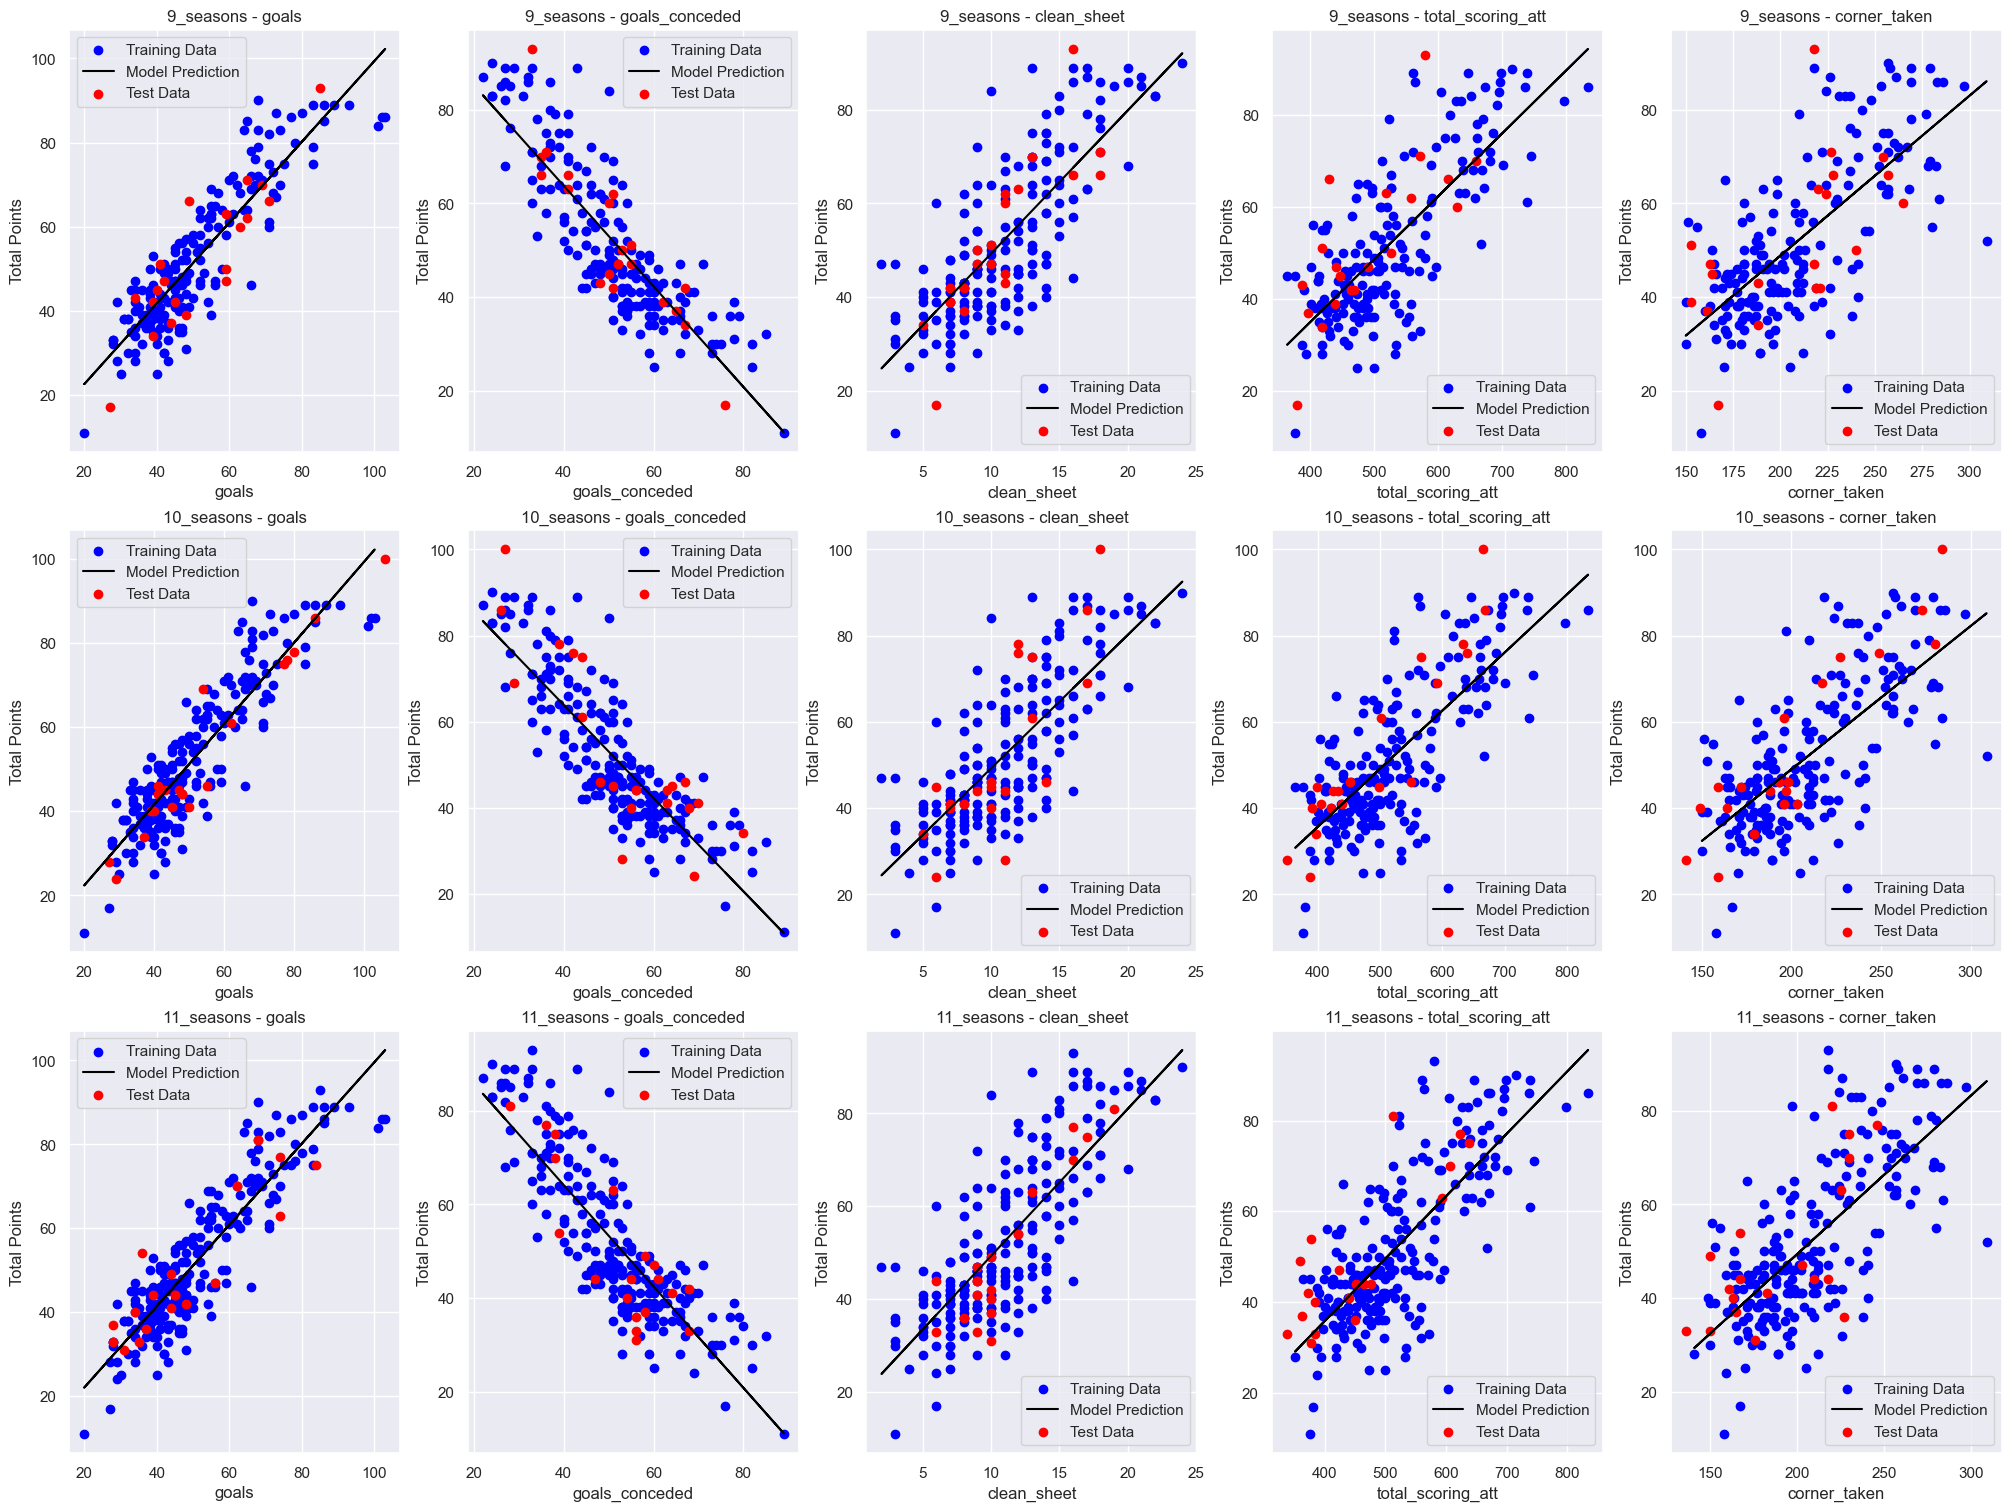

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Data splits for multiple seasons
season_splits = {
    "9_seasons": (statsDataFrame.iloc[:180], statsDataFrame.iloc[181:201]),
    "10_seasons": (statsDataFrame.iloc[:200], statsDataFrame.iloc[201:221]),
    "11_seasons": (statsDataFrame.iloc[:220], statsDataFrame.iloc[221:241])
}

predictors = ["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken",]

# Initialize a Linear Regression model
linreg = LinearRegression()

# Setup the figure for plotting
fig, axes = plt.subplots(nrows=len(season_splits), ncols=len(predictors), figsize=(20, 15), constrained_layout=True)
if len(season_splits) == 1:  # Handling the case where there's only one row
    axes = [axes]

# Iterate over each season and each predictor
for season_index, (season, (train_data, test_data)) in enumerate(season_splits.items()):
    print(f"Model results for training on {season} and testing on the next season:")
    for predictor_index, predictor in enumerate(predictors):
        # Fit the model using training data for each predictor
        X_train = train_data[[predictor]]
        y_train = train_data["total_points"]
        linreg.fit(X_train, y_train)
        
        # Compute R² and predict on training data to compute MSE
        train_score = linreg.score(X_train, y_train)
        y_train_pred = linreg.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        
        # Predict on testing data
        X_test = test_data[[predictor]]
        y_test = test_data["total_points"]
        test_score = linreg.score(X_test, y_test)
        y_test_pred = linreg.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # Plotting
        ax = axes[season_index][predictor_index]
        ax.scatter(X_train, y_train, color="blue", label="Training Data")
        ax.plot(X_train, y_train_pred, color="black", label="Model Prediction")
        ax.scatter(X_test, y_test, color="red", label="Test Data")
        ax.set_title(f"{season} - {predictor}")
        ax.set_xlabel(predictor)
        ax.set_ylabel("Total Points")
        ax.legend()

        # Print the results including intercept and coefficients
        print(f"Model details for predictor: {predictor}")
        print(f" Intercept of Regression: {linreg.intercept_}")
        print(f" Coefficient of Regression for {predictor}: {linreg.coef_[0]}")
        print(f" Goodness of Fit - Train Dataset:")
        print(f"  R^2 = {train_score:.4f}")
        print(f"  MSE = {train_mse:.4f}")
        print(f" Goodness of Fit - Test Dataset:")
        print(f"  R^2 = {test_score:.4f}")
        print(f"  MSE = {test_mse:.4f}")
        print()
    print("-----------------------------------------------------------------")

plt.show()

## Bi-Variate Analysis 

### For the first 9 Seasons Split:

#### Goals
- **Relationship**: Strong positive correlation with "total points".
- **Statistical Metrics**: R² is high (0.7913 for training, 0.7739 for testing), indicating that goals scored explain a large portion of the variance in "total points". The MSE indicates some prediction errors, but not overly high.

#### Goals Conceded
- **Relationship**: Significant negative correlation with "total points".
- **Statistical Metrics**: R² is substantial (0.7073 for training, 0.7935 for testing), suggesting this predictor also explains a good portion of the variance. Interestingly, the model performs better in testing than training based on R², with a lower MSE in the test data.

#### Clean Sheet
- **Relationship**: Moderate positive correlation with "total points".
- **Statistical Metrics**: Lower R² values (0.5993 for training, 0.6895 for testing) compared to 'goals', indicating less explanatory power. MSE is higher, especially in the training data, indicating more prediction errors.

#### Total Scoring Attempts
- **Relationship**: Positive but weaker correlation with "total points".
- **Statistical Metrics**: Moderate R² values (0.5675 for training, 0.4775 for testing) and high MSE, especially in the test data, suggest that total scoring attempts alone are not a very reliable predictor of "total points".

#### Corner Taken
- **Relationship**: Weakest positive correlation with "total points".
- **Statistical Metrics**: Lowest R² values (0.4994 for training, 0.3330 for testing) and highest MSE indicate this predictor has the least predictive power among those analyzed.

### For the 10 Seasons Split:

#### Goals
- **Relationship**: Strong positive correlation with "total points" persists.
- **Statistical Metrics**: Very high R² in testing (0.9254) indicates excellent predictive power. The MSE is significantly lower in the test data, suggesting precise predictions.

#### Goals Conceded
- **Relationship**: Consistent negative correlation with "total points".
- **Statistical Metrics**: R² is good (0.7166 for training, 0.6954 for testing), but the MSE increases notably in the test data compared to training.

#### Clean Sheet
- **Relationship**: Moderate positive correlation with "total points".
- **Statistical Metrics**: R² shows moderate predictive power (0.6087 for training, 0.5826 for testing), with a high MSE in the test data.

#### Total Scoring Attempts
- **Relationship**: Positive correlation with "total points".
- **Statistical Metrics**: R² and MSE show moderate predictive power and errors respectively, with a better R² in the test data (0.7417) compared to training.

#### Corner Taken
- **Relationship**: Weak positive correlation with "total points".
- **Statistical Metrics**: Low R² and high MSE in both training and test datasets suggest limited predictive capability.

### For the 11 Seasons Split:

#### Goals
- **Relationship**: Strong positive correlation with "total points" continues.
- **Statistical Metrics**: High R² values (0.8003 for training, 0.7796 for testing) and relatively low MSE indicate that goals are a reliable predictor of "total points".

#### Goals Conceded
- **Relationship**: Negative correlation with "total points".
- **Statistical Metrics**: Consistent R² (0.7119 for training, 0.6907 for testing) and an acceptable MSE suggest this predictor has a significant but less consistent impact than 'goals'.

#### Clean Sheet
- **Relationship**: Positive correlation with "total points".
- **Statistical Metrics**: Moderate R² values (0.6028 for training, 0.7662 for testing) and a varied MSE indicate decent predictive power, especially in the test data.

#### Total Scoring Attempts
- **Relationship**: Positive correlation but not as strong as 'goals'.
- **Statistical Metrics**: R² values are moderate (0.5738 for training, 0.5157 for testing), and MSE is high, indicating more variability in the predictive power.

#### Corner Taken
- **Relationship**: Weak positive correlation with "total points".
- **Statistical Metrics**: The lowest R² values (0.4982 for training, 0.4281 for testing) and high MSE indicate that 'corner_taken' is not a strong predictor of "total points".

### Summary across all Seasons
The consistent patterns seen across different season splits provide insights into the strengths and limitations of each predictor. "Goals" consistently demonstrates a strong positive impact on "total points", with robust model performance as shown by high R² and lower MSE. "Goals conceded" and "clean sheet" are also significant predictors with a noticeable impact, as evidenced by their coefficients and R² values, though with some variation in MSE. "Total scoring attempts" and "corner taken" have weaker predictive relationships with "total points", as shown by their lower R² values and higher MSEs, suggesting that they are less reliable predictors or that their relationships to "total points" may be influenced by more complex factors not captured in simple linear models

In [17]:
statsDataFrame.head(181)

,team,wins,losses,draw,total_points,placing,goal_difference,goals,total_yel_card,total_red_card,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,89.0,1,56.0,83.0,60.0,1.0,...,2397.0,918.0,258.0,25686.0,46.5,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,83.0,2,40.0,64.0,62.0,4.0,...,2270.0,897.0,231.0,24010.0,42.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,68.0,3,30.0,57.0,44.0,0.0,...,2800.0,1107.0,282.0,24150.0,52.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,68.0,4,28.0,63.0,59.0,3.0,...,2045.0,873.0,278.0,25592.0,54.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,60.0,5,3.0,57.0,48.0,3.0,...,2408.0,796.0,181.0,22200.0,48.5,2.0,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Aston Villa,10.0,20.0,8.0,38.0,17,-26.0,31.0,70.0,7.0,...,2740.0,766.0,171.0,23785.0,26.0,2.0,0.0,77.0,18.0,2014-2015
177,Hull City,8.0,19.0,11.0,35.0,18,-18.0,33.0,73.0,6.0,...,2726.0,804.0,169.0,22464.0,22.0,7.0,2.0,36.0,23.0,2014-2015
178,Burnley,7.0,19.0,12.0,33.0,19,-25.0,28.0,64.0,2.0,...,3021.0,783.0,171.0,21624.0,27.0,8.0,2.0,53.0,15.0,2014-2015
179,Queens Park Rangers,8.0,24.0,6.0,30.0,20,-31.0,42.0,75.0,3.0,...,3004.0,756.0,179.0,21907.0,39.0,6.0,2.0,57.0,20.0,2014-2015


## Multivariate Linear Regression

Intercept of Regression for 9 Seasons Training, Test on 10th Season: b =  38.12383654198296
Coefficients of Regression for 9 Seasons Training, Test on 10th Season:
          Predictors  Coefficients
0              goals      0.656370
1     goals_conceded     -0.457753
2        clean_sheet      0.570009
3  total_scoring_att      0.002371
4       corner_taken     -0.016992



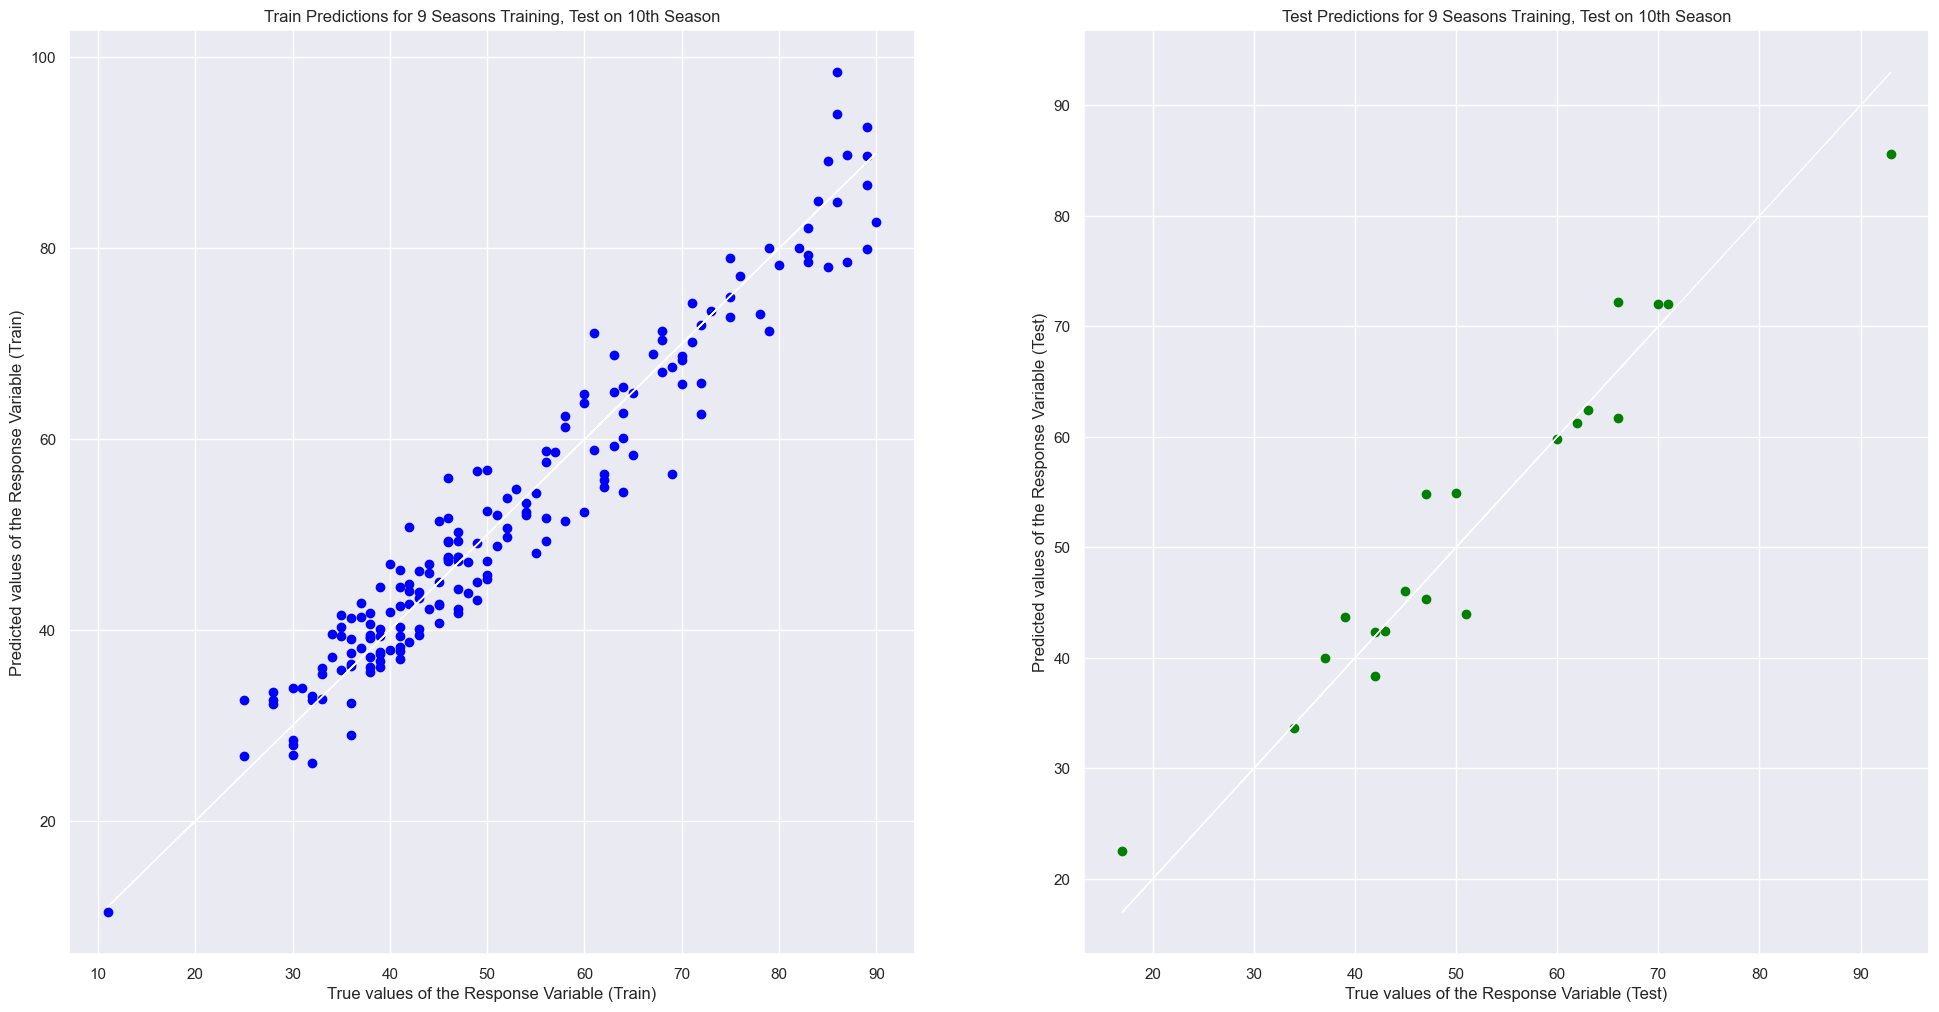

Goodness of Fit of Model 	Train Dataset (9 Seasons Training, Test on 10th Season)
Explained Variance (R^2) 	: 0.9387443567079293
Mean Squared Error (MSE) 	: 17.63966660001601

Goodness of Fit of Model 	Test Dataset (9 Seasons Training, Test on 10th Season)
Explained Variance (R^2) 	: 0.9380921946341509
Mean Squared Error (MSE) 	: 16.621471893163392

Intercept of Regression for 10 Seasons Training, Test on 11th Season: b =  40.201238327979866
Coefficients of Regression for 10 Seasons Training, Test on 11th Season:
          Predictors  Coefficients
0              goals      0.653928
1     goals_conceded     -0.476576
2        clean_sheet      0.563713
3  total_scoring_att      0.002103
4       corner_taken     -0.020972



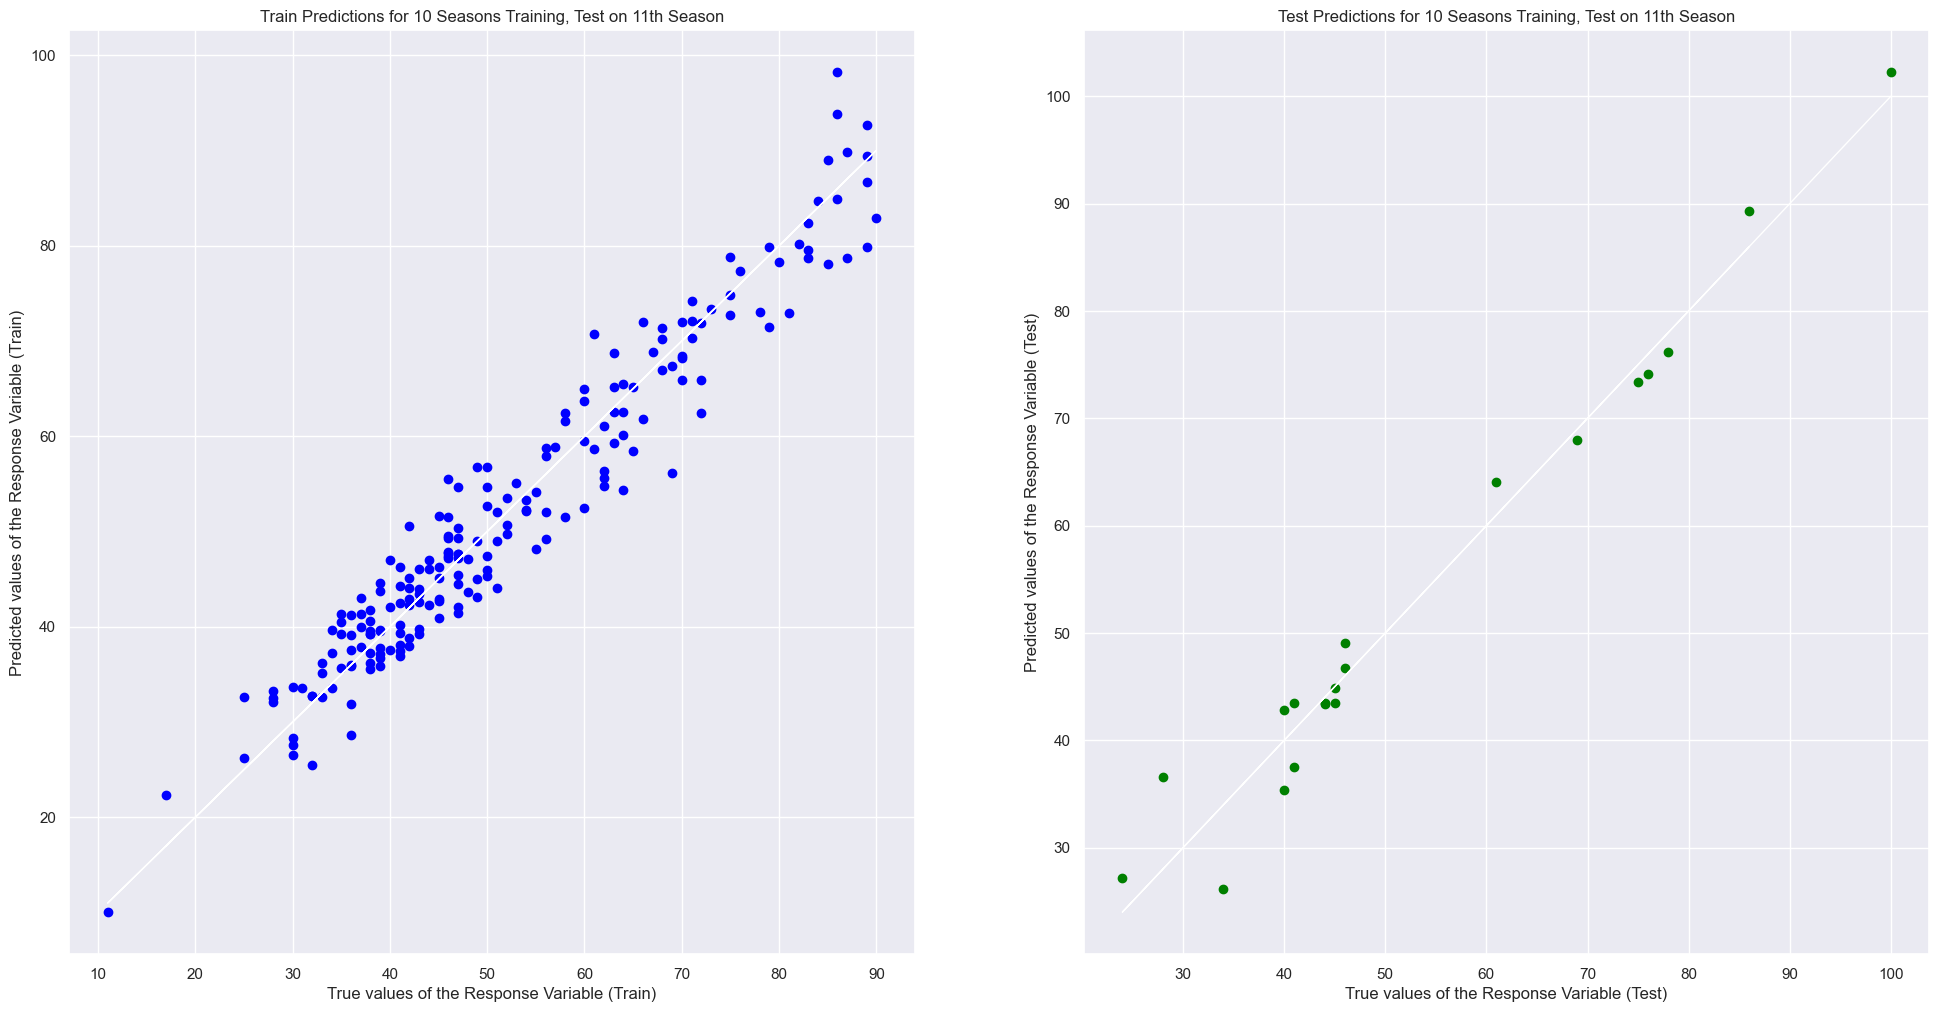

Goodness of Fit of Model 	Train Dataset (10 Seasons Training, Test on 11th Season)
Explained Variance (R^2) 	: 0.9376502521294973
Mean Squared Error (MSE) 	: 17.572401982087307

Goodness of Fit of Model 	Test Dataset (10 Seasons Training, Test on 11th Season)
Explained Variance (R^2) 	: 0.9701597024438258
Mean Squared Error (MSE) 	: 12.080173058922131

Intercept of Regression for 11 Seasons Training, Test on 12th Season: b =  38.21594786107977
Coefficients of Regression for 11 Seasons Training, Test on 12th Season:
          Predictors  Coefficients
0              goals      0.670028
1     goals_conceded     -0.456509
2        clean_sheet      0.577108
3  total_scoring_att      0.001323
4       corner_taken     -0.018956



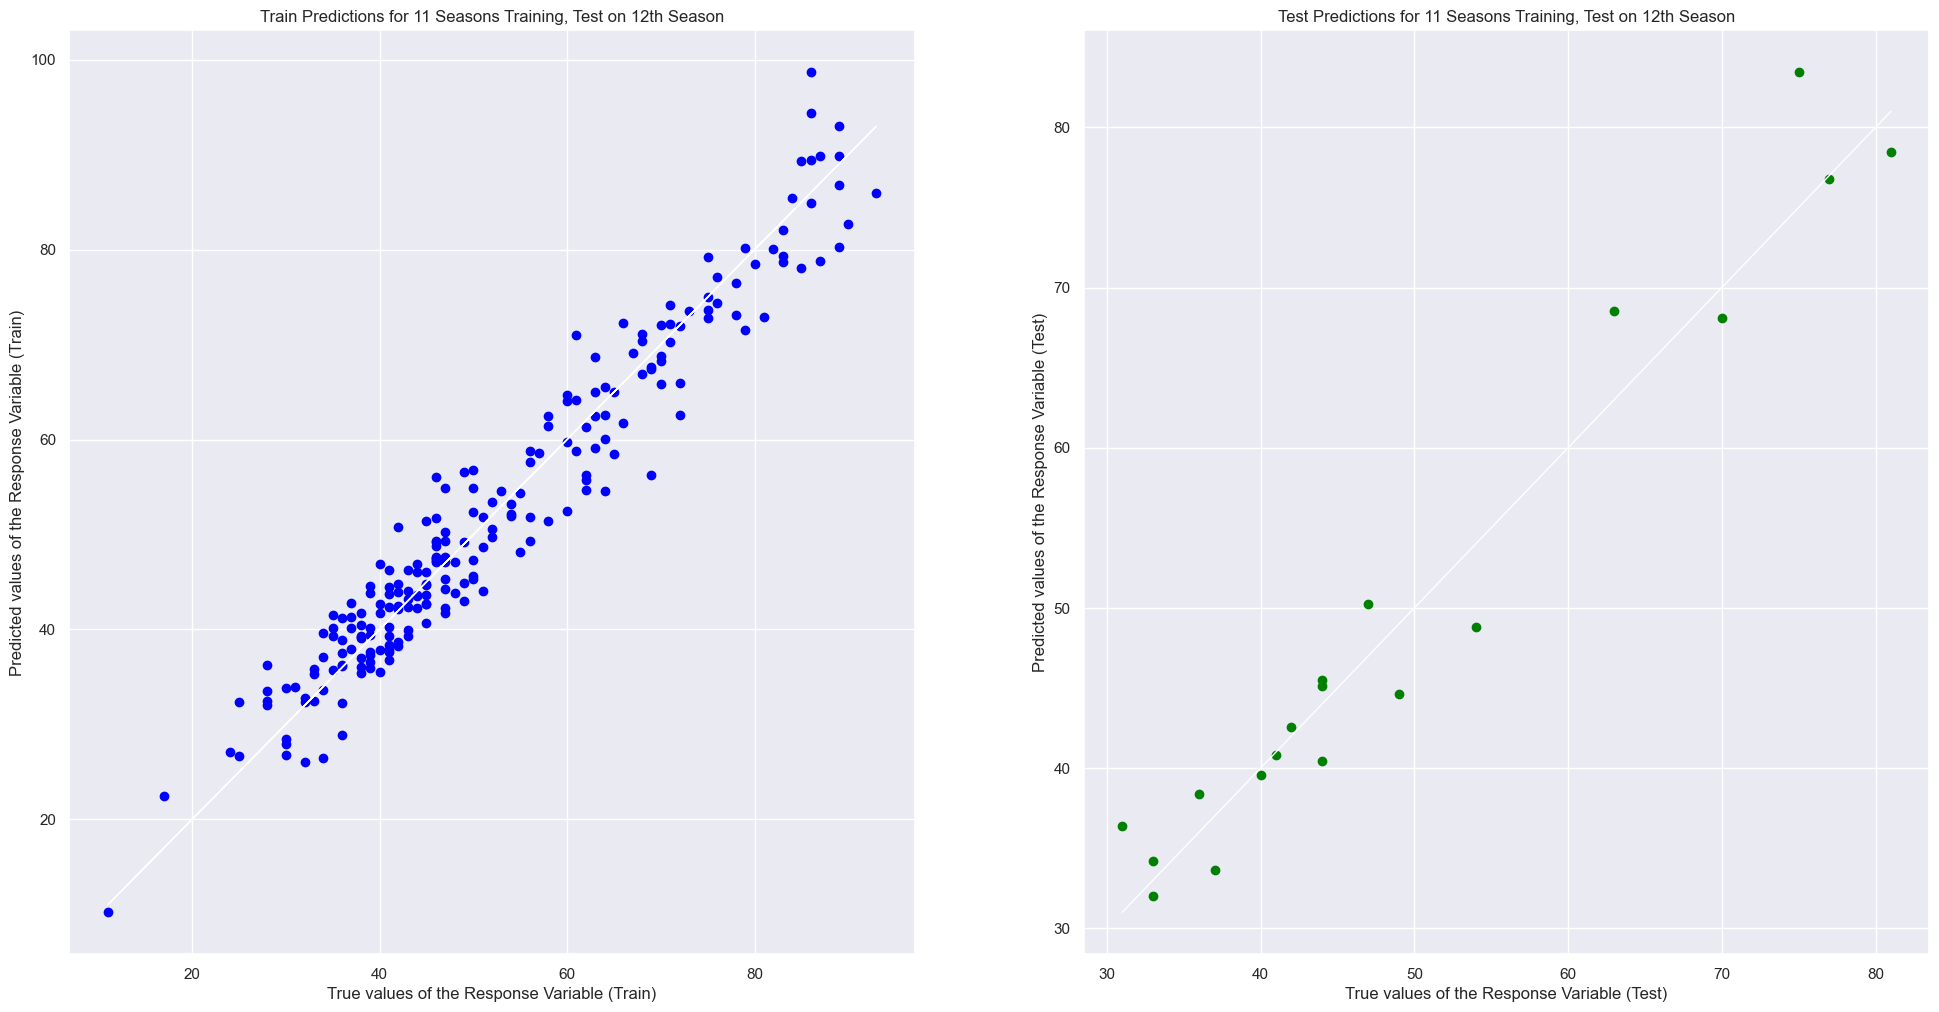

Goodness of Fit of Model 	Train Dataset (11 Seasons Training, Test on 12th Season)
Explained Variance (R^2) 	: 0.9405910170660783
Mean Squared Error (MSE) 	: 17.245734231763794

Goodness of Fit of Model 	Test Dataset (11 Seasons Training, Test on 12th Season)
Explained Variance (R^2) 	: 0.9487910599269608
Mean Squared Error (MSE) 	: 12.297521974548237



In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


train_data_9_seasons = statsDataFrame.iloc[:180]   # First 9 seasons samples for training
test_data_10th_season = statsDataFrame.iloc[181:201]   # Number 10th season sample for testing

train_data_10_seasons = statsDataFrame.iloc[:200]   # First 10 seasons samples for training
test_data_11th_season = statsDataFrame.iloc[201:221]   # Number 11th sample for testing

train_data_11_seasons = statsDataFrame.iloc[:220]   # First 11 seasons samples for training
test_data_12th_season = statsDataFrame.iloc[221:241]   # Number 12th sample for testing


# Function to train the model and plot results
def train_and_plot(X_train, y_train, X_test, y_test, title_suffix):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Output the intercept and coefficients
    print(f'Intercept of Regression for {title_suffix}: b = ', linreg.intercept_)
    print(f'Coefficients of Regression for {title_suffix}:')
    # Ensure that coefficients are formatted as a list of lists (if they are not already)
    coef_list = linreg.coef_.tolist()[0] if len(linreg.coef_.shape) > 1 else linreg.coef_.tolist()
    print(pd.DataFrame(list(zip(X_train.columns, coef_list)), columns=["Predictors", "Coefficients"]))
    print()

    # Predictions
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Visualization
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color="blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth=1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[0].set_title(f"Train Predictions for {title_suffix}")

    axes[1].scatter(y_test, y_test_pred, color="green")
    axes[1].plot(y_test, y_test, 'w-', linewidth=1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    axes[1].set_title(f"Test Predictions for {title_suffix}")
    plt.show()

    # Goodness of Fit
    print(f"Goodness of Fit of Model \tTrain Dataset ({title_suffix})")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    print(f"Goodness of Fit of Model \tTest Dataset ({title_suffix})")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
# Train and test for the 9th season
X_train = train_data_9_seasons[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken"]]
y_train = train_data_9_seasons["total_points"]
X_test = test_data_10th_season[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken"]]
y_test = test_data_10th_season["total_points"]

train_and_plot(X_train, y_train, X_test, y_test, "9 Seasons Training, Test on 10th Season")

# Train and test for the 10th season
X_train = train_data_10_seasons[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken"]]
y_train = train_data_10_seasons["total_points"]
X_test = test_data_11th_season[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken"]]
y_test = test_data_11th_season["total_points"]

train_and_plot(X_train, y_train, X_test, y_test, "10 Seasons Training, Test on 11th Season")

# Train and test for the 11th season
X_train = train_data_11_seasons[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken"]]
y_train = train_data_11_seasons["total_points"]
X_test = test_data_12th_season[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "corner_taken"]]
y_test = test_data_12th_season["total_points"]

train_and_plot(X_train, y_train, X_test, y_test, "11 Seasons Training, Test on 12th Season")

# Classification

For our classification task, we decided to explore a new approach. Instead of relying on the comprehensive statsDataFrame.csv file, which includes seasonal statistics from 2006 to 2018, we chose to focus more narrowly on aspects directly related to football betting. Through Kaggle, we gained access not only to the statsDataFrame.csv file but also to match datasets spanning from 2016 to 2019. These match datasets provide detailed information on every match played by each club over three specific seasons. Our objective is to use past data to predict the Full-Time Results (FTR) of matches through classification techniques. FTR is a common betting type that attracts a wide range of bettors, from casual fans to serious gamblers, making it a particularly relevant focus for our predictive modeling.

## Exploratory Data Analysis

In [19]:
# List of datasets
datasets = ['2016-2017.csv', '2017-2018.csv', '2018-2019.csv']
summary_data = []

# Loop through each dataset and collect the required analysis
for dataset in datasets:
    # Load the dataset
    data = pd.read_csv(dataset)
    
    # Gather data
    shape = data.shape
    missing_values = data.isnull().sum().sum()  # Total number of missing values
    description = data.describe().transpose()  # Basic statistics for numerical columns

    # Collect summary for this dataset
    summary = {
        'Dataset': dataset,
        'Rows': shape[0],
        'Columns': shape[1],
        'Total Missing Values': missing_values,
        'Mean of Numerical Features': description['mean'].mean() if not description.empty else None,
        'Min of Numerical Features': description['min'].min() if not description.empty else None,
        'Max of Numerical Features': description['max'].max() if not description.empty else None,
    }
    summary_data.append(summary)

# Convert collected data into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
print(summary_df)


         Dataset  Rows  Columns  Total Missing Values  \
0  2016-2017.csv   380       65                     0   
1  2017-2018.csv   380       65                     0   
2  2018-2019.csv   380       62                     0   

   Mean of Numerical Features  Min of Numerical Features  \
0                    5.696880                      -2.75   
1                    5.283800                      -2.75   
2                    5.428509                      -3.00   

   Max of Numerical Features  
0                       57.0  
1                       43.0  
2                       60.0  


## Adding of new column "qualifications" to the statsDataFrame

Positions 1-4 qualify for champion's league | Position(s) 5 qualify for europa league | Positions 18-20 qualify for relegation | Remaining positions do not qualify for any other leagues

In [20]:
# def determine_qualification(placing):
#     if 1 <= placing <= 4:
#         return 'Champions League'
#     elif placing == 5:
#         return 'Europa League'
#     elif 18 <= placing <= 20:
#         return 'Relegation'
#     else:
#         return 'No qualifications'

    
# statsDataFrame['qualifications'] = statsDataFrame['placing'].apply(determine_qualification)
# # Find the index of the 'placement' column
# placement_index = statsDataFrame.columns.get_loc('placing')

# # Insert the 'qualifications' column right after the 'placement' column
# # We use placement_index + 1 to place it right after the 'placement' column
# statsDataFrame.insert(placement_index + 1, 'qualifications_new', statsDataFrame['qualifications'])

# # Now you can drop the old 'qualifications' column since it's duplicated
# statsDataFrame.drop('qualifications', axis=1, inplace=True)

# # Rename the new column back to 'qualifications'
# statsDataFrame.rename(columns={'qualifications_new': 'qualifications'}, inplace=True)

## Gradient Boosting Machine Classification

For classification, we are utilizing the Gradient Boosting Machine (GBM) as our classifier. GBM excels in handling complex and non-linear relationships between features, which is particularly advantageous in sports predictions. It sequentially adds trees that address the residuals or errors of previous trees, effectively reducing variance in predictions. Our goal is to predict the Full-Time Results (FTR) of matches before they conclude for the 2016-2017 season.

However, it is important to note that full-time statistics collected after a match ends—such as full-time home/away goals, home/away shots, and even fouls—should not be included as feature variables to prevent potential data leakage. Therefore, the statistics utilized from the dataset should only include data available up to a certain point, such as Half-Time Home Goals (HTHG), Half-Time Away Goals (HTAG), and Half-Time Result (HTR), for predicting the match outcomes.

Ideally, it would be beneficial if we were provided with additional halftime statistics like shots on target, corners, and possession, as these are valuable predictors. Unfortunately, these stats were not included in our dataset. It should also be noted that the prediction of the FTR can only be made once the halftime results are available.

We decided to split the training and testing data sequentially by an 80:20 ratio. Based on these splits, we will evaluate the model's performance and print out the decision trees, confusion matrix, and accuracies. To assess the model's consistency, we will run it against two additional seasons: 2017-2018 and 2018-2019. A comparative analysis will be provided at the end based on these results.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

def plot_trees(gbm_model, X_train, num_trees=3):
    feature_names_list = X_train.columns.tolist()  # Convert feature names to a list
    class_names_list = gbm_model.classes_.tolist()  # Convert class names to a list
    for tree_index in range(min(num_trees, len(gbm_model.estimators_))):
        tree = gbm_model.estimators_[tree_index, 0]
        plt.figure(figsize=(20, 10))
        plot_tree(tree, filled=True, feature_names=feature_names_list, class_names=class_names_list, max_depth=3)
        plt.title(f'Decision Tree {tree_index} from {dataset}')
        plt.show()

def run_model(dataset):
    # Load the dataset
    data = pd.read_csv(dataset)

    # One-hot encode 'HTR'
    encoder = OneHotEncoder(sparse=False)
    htr_encoded = encoder.fit_transform(data[['HTR']])
    htr_encoded_df = pd.DataFrame(htr_encoded, columns=encoder.get_feature_names_out(['HTR']))

    # Concatenate the encoded df with the original df and drop the original 'HTR' column
    data = pd.concat([data, htr_encoded_df], axis=1).drop(columns=['HTR'])

    # Selecting features and target
    #'B365H', 'B365D', 'B365A'
    X = data[['HTHG', 'HTAG'] + list(htr_encoded_df.columns)]
    y = data['FTR']

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

    # Initialize and train the Gradient Boosting Classifier with adjusted parameters
    model = GradientBoostingClassifier(
        random_state=42,
        n_estimators=120,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.8,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features=0.8  # Use 80% of features at each split
    )
    model.fit(X_train, y_train)

    # Predict on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy on training and test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy for {dataset}: {train_accuracy:.2%}")
    print(f"Test Accuracy for {dataset}: {test_accuracy:.2%}")

    # Plot decision trees and confusion matrix as before
    plot_trees(model, X_train, num_trees=3)
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"Confusion Matrix for {dataset}:\n", cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {dataset}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# List of datasets
datasets = ['2016-2017.csv', '2017-2018.csv', '2018-2019.csv']

# Run the model on each dataset
for dataset in datasets:
    run_model(dataset)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

# Anomaly Detection

## Cherry-pick famous clubs

In [ ]:
all_seasons = set(statsDataFrame['season'].unique())

# Group by 'team' and aggregate seasons into a set for each team
teams_seasons = statsDataFrame.groupby('team')['season'].agg(set)

# Filter teams that have data for all seasons
consistent_teams = teams_seasons[teams_seasons.apply(lambda x: x == all_seasons)]

# Extract the list of consistent teams
consistent_team_list = consistent_teams.index.tolist()

# Filter the original DataFrame to include only consistent teams
filtered_df = statsDataFrame[statsDataFrame['team'].isin(consistent_team_list)]
print("Teams that appeared in all seasons:", consistent_team_list)

In [ ]:
## Anomaly Detection

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler



# Select features for anomaly detection
features = ['wins', 'losses', 'draw', 'total_points', 'goal_difference','placing']

# List of team names to analyze
team_names = ['Arsenal', 'Chelsea', 'Everton', 'Liverpool', 'Manchester City','Manchester United', 'Tottenham Hotspur']

for team_name in team_names:
    # Filter data for the specific team
    team_data = statsDataFrame[statsDataFrame['team'] == team_name].copy()

    # Create feature matrix
    X = team_data[features]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train the Isolation Forest model
    isolation_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter based on expected outlier percentage
    isolation_forest.fit(X_scaled)

    # Predict outliers
    outliers = isolation_forest.predict(X_scaled)

    # Add outlier predictions to the original dataset
    team_data.loc[:, 'anomaly'] = outliers

    # Print rows flagged as anomalies
    anomalies = team_data[team_data['anomaly'] == -1]
    print("Anomalies for", team_name, ":")
    print(anomalies)

# Analysis

Leveraging anomaly detection enables us to delve deeper into unexplored variables absent from the dataset, thereby enhancing our predictive capabilities for informed betting decisions. These variables often necessitate domain expertise, such as managerial changes and substantial increases in financial resources allocated for team expenditures.Through an analysis of the anomalous seasonal performance of teams, we can delve into historical news archives to discern the factors contributing to these anomalies. By examining past news reports, we aim to unravel the underlying changes and events that may have precipitated these deviations from expected performance metrics. By using anormaly detection on the teams which consistently played in the Premier League, we hope to hide some insights on the factors contributing to these anomalies.

Arsenal<br>
Abnormal Seasons:2017-2018<br>
Reason: Arsène Wenger, manager, announced his departure from Arsenal at the end of the 2017-2018 season, but he remained in charge until the end of that season. Therefore, his impending departure could still have had an impact on the team's performance during the 2017-2018 season. 

Chelsea <br>
Abnormal Seasons:2015-2016<br>
Reason:Chelsea experienced instability in their managerial position during that season. José Mourinho, who had guided Chelsea to the Premier League title in the previous season, faced challenges as the team struggled to replicate their previous success. Mourinho was sacked in December 2015 following a string of poor results, which contributed to the team's overall decline.

Everton <br>
Abnormal Seasons:2015-2016<br>
Reason:Everton experienced managerial instability during the 2015-2016 season. Roberto Martinez, who had previously enjoyed success with the club, faced challenges as the team struggled to find consistency and results. Martinez's tactics and team selections came under scrutiny as Everton failed to meet expectations.

Liverpool <br>*
Abnormal Seasons:2013-2014 <br>
Reason:Under the guidance of Brendan Rodgers, Liverpool displayed an attacking and entertaining style of play that captivated fans and pundits alike. Rodgers instilled a high-pressing, possession-based philosophy that allowed Liverpool to dominate games and score goals prolifically. Although having completed 1 season prior, Rodgers was fairly new

Manchester City<br> *
Abnormal Seasons:2006-2007 <br>
Reason:During the 2006-2007 season, Manchester City experienced managerial instability, with Stuart Pearce being replaced by Sven-Göran Eriksson midway through the season. Such changes can disrupt the team's rhythm and affect performance.

Manchester United<br> *
Abnormal Seasons:2013-2014  <br>
Reason: The 2013-2014 season marked a transition period for Manchester United following the retirement of their long-serving manager, Sir Alex Ferguson. David Moyes took over as manager, inheriting a squad that had been accustomed to Ferguson's management style and tactics. Adjusting to a new manager and his methods can take time and may lead to inconsistency on the field.

Tottenham Hotspur<br> *
Abnormal Seasons:2007-2008   <br>
Reason:Tottenham underwent managerial changes during the 2007-2008 season, which can often disrupt team stability and affect performance. Martin Jol began the season as the manager but was replaced by Juande Ramos in October 2007. Adjusting to a new manager's tactics and philosophy mid-season can lead to inconsistency and uncertainty within the squad.

From this analysis, one can conclude that mmanagerial changes can exert profound effects that can manifest in either notable improvements or declines.